In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import re

### Listings File

In [2]:
listing_df = pd.read_csv(r"E:\Michaelmas\BU7141-Data Management & Viz\Group Project\listings.csv")

In [3]:
listing_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665000,https://www.airbnb.com/rooms/739333866230665371,20240904164109,45539,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500000,https://www.airbnb.com/rooms/572612125615500056,20240904164109,45539,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,45539,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830000,https://www.airbnb.com/rooms/838141198693830649,20240904164109,45539,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919350000,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,45539,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37536,943355797386691000,https://www.airbnb.com/rooms/943355797386691170,20240904164109,45540,city scrape,basement#4,"Please read the amenities we offer, doing as t...",NaN,https://a0.muscache.com/pictures/86532950-b457...,424334449,...,4.20,3.80,3.80,NaN,t,6,0,6,0,0.38
37537,783387491435863000,https://www.airbnb.com/rooms/783387491435863626,20240904164109,45540,city scrape,Modern 3 Bed 2 Bath Home With Parking | 2 min LGA,"Welcome to Fly-Inn, a stylish retreat in the h...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,491695460,...,4.89,4.78,4.77,OSE-STRREG-0001661,f,1,1,0,0,4.97
37538,45834849,https://www.airbnb.com/rooms/45834849,20240904164109,45540,city scrape,Home away from Home,"Clean, quiet, safe, comfortable and easily acc...",NaN,https://a0.muscache.com/pictures/58b10170-a925...,347560493,...,4.60,4.40,4.30,OSE-STRREG-0000299,f,4,0,4,0,1.22
37539,53194676,https://www.airbnb.com/rooms/53194676,20240904164109,45540,city scrape,"Traveling Nurses Utilities, Driveway, Washer/D...","Private driveway, wash machine, dryer, utiliti...","The Bronx has the best pizza, Italian restaura...",https://a0.muscache.com/pictures/59d34d45-d2c0...,127112667,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [4]:
listing_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                      int64
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [5]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
# Checking nulls in all columns
null_counts =listing_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

name                               2
description                     1320
neighborhood_overview          16650
picture_url                        1
host_name                          5
host_since                         5
host_location                   8079
host_about                     16247
host_response_time             14897
host_response_rate             14897
host_acceptance_rate           14311
host_is_superhost                429
host_thumbnail_url                 5
host_picture_url                   5
host_neighbourhood              7515
host_listings_count                5
host_total_listings_count          5
host_verifications                 5
host_has_profile_pic               5
host_identity_verified             5
neighbourhood                  16649
bathrooms                      14751
bathrooms_text                    32
bedrooms                        5841
beds                           14886
price                          14751
minimum_minimum_nights             1
m

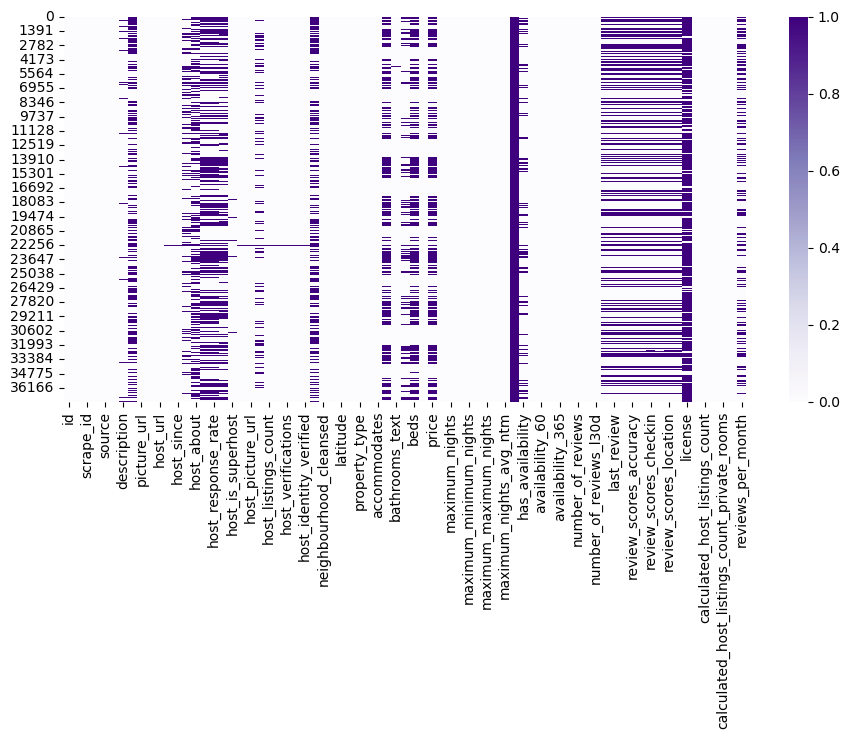

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               11540
Length: 75, dtype: int64


In [7]:
# Heatmap of Missing values in the dataset
plt.figure(figsize=(11,5))
sns.heatmap(listing_df.isna(),cmap='Purples')
plt.show()
print(listing_df.isna().sum())

In [8]:
listing_df.describe()

,id,scrape_id,last_scraped,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.754100e+04,3.754100e+04,37541.000000,3.754100e+04,37536.000000,37536.000000,37541.000000,37541.000000,37541.000000,22790.000000,...,26000.000000,25986.000000,25995.000000,25983.000000,25984.000000,37541.000000,37541.000000,37541.000000,37541.000000,26001.000000
mean,3.783277e+17,2.024090e+13,45539.679684,1.682797e+08,210.164509,294.218057,40.728722,-73.946982,2.760262,1.187297,...,4.656433,4.831447,4.825776,4.741619,4.642455,56.169974,29.927972,24.236701,0.058363,0.892457
std,4.643902e+17,1.014467e+01,0.466604,1.820582e+08,830.651876,1050.908535,0.056340,0.054604,1.925977,0.551219,...,0.501060,0.377703,0.407848,0.393922,0.486093,170.598777,136.427099,107.796624,0.547701,1.864734
min,2.595000e+03,2.024090e+13,45539.000000,1.678000e+03,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.063928e+07,2.024090e+13,45539.000000,1.705622e+07,1.000000,1.000000,40.688491,-73.983108,2.000000,1.000000,...,4.530000,4.810000,4.820000,4.650000,4.530000,1.000000,0.000000,0.000000,0.000000,0.090000
50%,4.866104e+07,2.024090e+13,45540.000000,8.415508e+07,2.000000,3.000000,40.726090,-73.954540,2.000000,1.000000,...,4.810000,4.950000,4.960000,4.850000,4.760000,2.000000,1.000000,1.000000,0.000000,0.320000
75%,8.450413e+17,2.024090e+13,45540.000000,3.052402e+08,9.000000,13.000000,40.762380,-73.927800,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,8.000000,2.000000,2.000000,0.000000,1.070000
max,1.237702e+18,2.024090e+13,45540.000000,5.992925e+08,4494.000000,9019.000000,40.911390,-73.713650,16.000000,15.500000,...,5.000000,5.000000,5.000000,5.000000,5.000000,876.000000,876.000000,719.000000,12.000000,110.100000


In [9]:
# Unique host
unique_hosts = listing_df['host_id'].nunique()
print("Number of unique hosts:", unique_hosts)

Number of unique hosts: 22458


In [10]:
# Unique listings
unique_listings = listing_df['id'].nunique()
print("Number of unique listings:", unique_listings)

Number of unique listings: 37541


#### Data Cleansing & Transformation

In [11]:
# Dropping irrelevant columns
listing_dropped_df = listing_df.drop(['listing_url','scrape_id', 'last_scraped','source', 'description', 'neighborhood_overview', 
                                      'host_neighbourhood', 'picture_url' ,'host_url','host_thumbnail_url', 'host_picture_url', 'host_acceptance_rate',
                                      'host_has_profile_pic', 'neighbourhood', 'minimum_nights', 'maximum_nights','maximum_maximum_nights',
                                      'minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights', 
                                      'minimum_nights','maximum_nights', 'availability_30',
                                      'availability_60', 'availability_90', 'calendar_updated','calendar_last_scraped', 
                                      'number_of_reviews_ltm', 'bathrooms_text', 'beds', 
                                      'number_of_reviews_l30d', 'first_review','last_review', 'host_location',	'host_about',
                                      'host_response_time','calculated_host_listings_count', 
                                      'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                                      'calculated_host_listings_count_shared_rooms','reviews_per_month', 'review_scores_accuracy', 
                                      'review_scores_checkin',  'review_scores_communication', 'host_verifications'], axis=1)

In [12]:
# Rename neighbourhood_cleansed	& neighbourhood_group_cleansed
listing_dropped_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)
listing_dropped_df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'}, inplace=True)

In [13]:
# Host Since in years and month
def calculate_host_since(date_str):
    if pd.isna(date_str):
        return None
    host_since_date = datetime.strptime(date_str, '%Y-%m-%d')
    today = datetime.today()
    delta = today - host_since_date
    years = delta.days // 365
    months = (delta.days % 365) // 30
    return f"{years} years, {months} months"

listing_dropped_df['host_since_years_months'] = listing_dropped_df['host_since'].apply(calculate_host_since)
print("Host Since in Years/Months:")
print(listing_dropped_df[['host_id', 'host_since', 'host_since_years_months']].head())

Host Since in Years/Months:
     host_id  host_since host_since_years_months
0    3013025  2012-07-21      12 years, 3 months
1  358089614  2020-07-23       4 years, 3 months
2   39162543  2015-07-21       9 years, 3 months
3  148571080  2017-08-31       7 years, 2 months
4  394869975  2021-03-30       3 years, 7 months


In [14]:
# Impute Reviews wherever blank with 0
# review_scores_rating - Average rating score based on all reviews.
# review_scores_cleanliness - Average cleanliness score based on guest reviews.
# review_scores_location - Average location score based on guest reviews.
# review_scores_value - Average value-for-money score based on guest reviews.
columns_to_impute = [
                        'review_scores_rating',
                        'review_scores_cleanliness',
                        'review_scores_location',
                        'review_scores_value'
                    ]

listing_dropped_df[columns_to_impute] = listing_dropped_df[columns_to_impute].fillna(0)

Text(0, 0.5, 'Frequency')

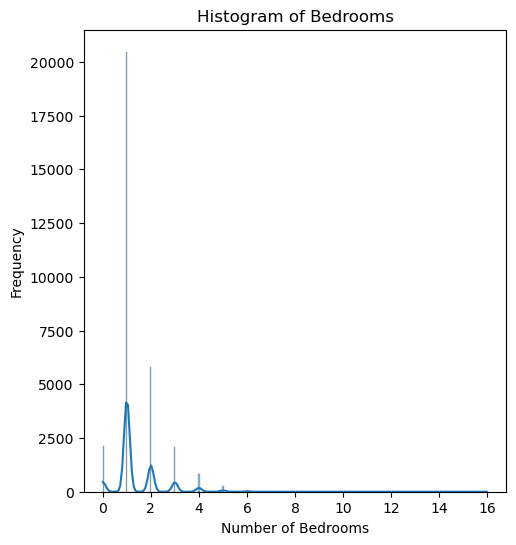

In [15]:
# To check if we should impute with mean/median
# If data is normally distributed we go with mean else with median, since, median handles outliers better than mean
bedrooms = listing_dropped_df['bedrooms'].dropna()  

# Distribution of data
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(bedrooms, kde=True)
plt.title('Histogram of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

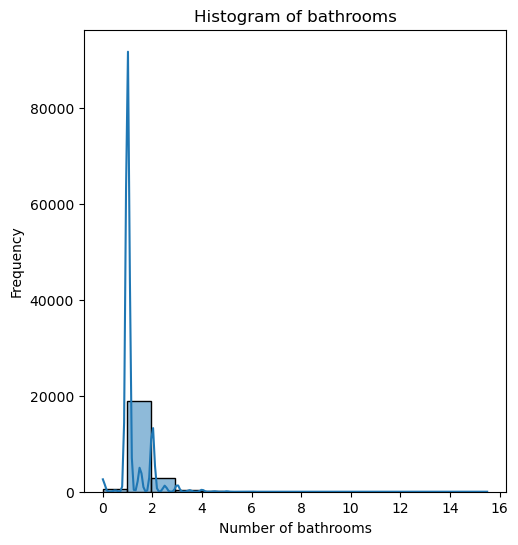

In [16]:
# To check if we should impute with mean/median
# If data is normally distributed we go with mean else with median, since, median handles outliers better than mean
# Distribution of data
bathrooms = listing_dropped_df['bathrooms'].dropna()
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(bathrooms, kde=True)
plt.title('Histogram of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Frequency')

In [17]:
#  Impute bathrooms and bedrooms with the median of their respective columns (Data is not normally distributed, therefore, using median values to impute)
listing_dropped_df['bathrooms'] = listing_dropped_df['bathrooms'].fillna(listing_dropped_df['bathrooms'].median())
listing_dropped_df['bedrooms'] = listing_dropped_df['bedrooms'].fillna(listing_dropped_df['bedrooms'].median())
listing_dropped_df['bathrooms'] = listing_dropped_df['bathrooms'].astype(int)
listing_dropped_df['bedrooms'] = listing_dropped_df['bedrooms'].astype(int)

In [18]:
# host_identity_verified, if f->Unverified, if t->Verified
listing_dropped_df['host_identity_verified'] = listing_dropped_df['host_identity_verified'].replace({'f': 'Unverified', 't': 'Verified'})

In [19]:
# Fill NaN values and blank values in the 'license' column with "Unlicensed"
listing_dropped_df['license'] = listing_dropped_df['license'].replace('', np.nan)  
listing_dropped_df['license'] = listing_dropped_df['license'].fillna('Unlicensed') 

In [20]:
# host_is_superhost, if f->false, if t-True. Blank/Null value with Not Available
listing_dropped_df['host_is_superhost'] = listing_dropped_df['host_is_superhost'].replace({'f': False, 't': True})
listing_dropped_df['host_is_superhost'] = listing_dropped_df['host_is_superhost'].replace('', np.nan)  
listing_dropped_df['host_is_superhost'] = listing_dropped_df['host_is_superhost'].fillna('Not Available') 

In [21]:
# Maximum of 5 records in each of columns are blanks/null
# Drop records where name, host_total_listings_count, host_identity_verified is blank or null 
listing_dropped_df = listing_dropped_df[listing_dropped_df['name'].notna() & (listing_dropped_df['name'] != '')]
listing_dropped_df = listing_dropped_df[listing_dropped_df['host_total_listings_count'].notna() & (listing_dropped_df['host_total_listings_count'] != '')]
listing_dropped_df['host_total_listings_count'] = listing_dropped_df['host_total_listings_count'].astype(int)
listing_dropped_df = listing_dropped_df[listing_dropped_df['host_identity_verified'].notna() & (listing_dropped_df['host_identity_verified'] != '')]

In [22]:
# Convert the price column, object -> string first
listing_dropped_df['price'] = listing_dropped_df['price'].astype(str)

# Remove the dollar sign and commas, then dtype to numeric
listing_dropped_df['price'] = listing_dropped_df['price'].str.replace('$', '', regex=False) \
                                                             .str.replace(',', '', regex=False) \
                                                             .astype(float)

Text(0, 0.5, 'Frequency')

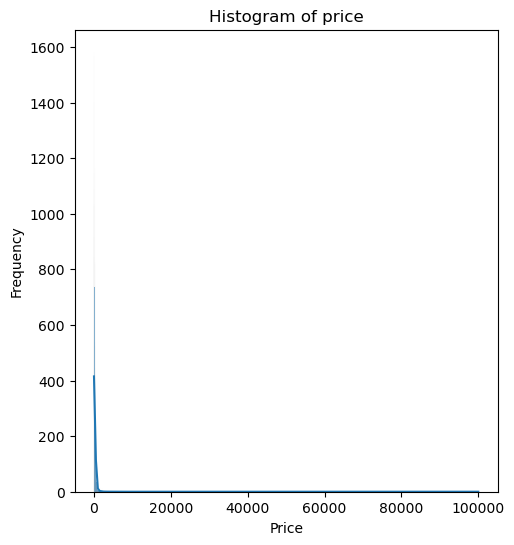

In [23]:
# To check if we should impute with mean/median
# If data is normally distributed we go with mean else with median, since, median handles outliers better than mean
# Drop NaN values 
price = listing_dropped_df['price'].dropna()  

# Distribution of data
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(price, kde=True)
plt.title('Histogram of price')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [24]:
# Fill blank values with the median of the price column
median_price = listing_dropped_df['price'].median()
listing_dropped_df['price'] = listing_dropped_df['price'].fillna(median_price)

Text(0, 0.5, 'Frequency')

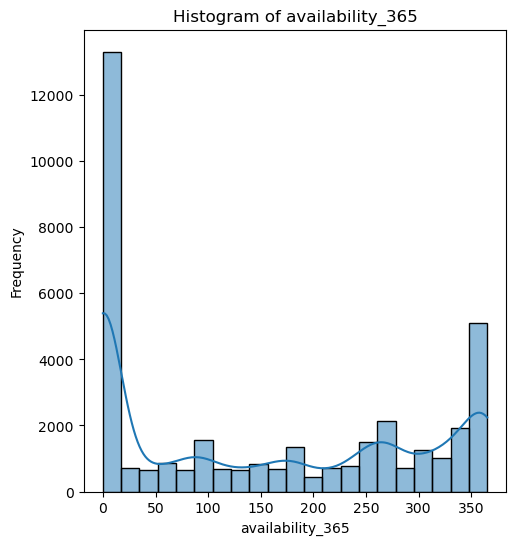

In [25]:
# To check if we should impute with mean/median
# If data is normally distributed we go with mean else with median, since, median handles outliers better than mean
# Drop NaN values 
availability_365 = listing_dropped_df['availability_365'].dropna()  

# Distribution of data
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(availability_365, kde=True)
plt.title('Histogram of availability_365')
plt.xlabel('availability_365')
plt.ylabel('Frequency')

In [26]:
# Median of the availability_365 column
median_availability_365 = listing_dropped_df['availability_365'].median()

# Impute zero values with the median
listing_dropped_df['availability_365'] = listing_dropped_df['availability_365'].replace(0, median_availability_365)

In [27]:
# Calculate yearly and monthly revenues
listing_dropped_df['total_reservation_days'] = 365 - listing_dropped_df['availability_365']
listing_dropped_df['yearly_airbnb_revenue'] = listing_dropped_df['price'] * listing_dropped_df['total_reservation_days']
listing_dropped_df['monthly_airbnb_revenue'] = listing_dropped_df['yearly_airbnb_revenue'] / 12

In [28]:
listing_final_df = listing_dropped_df[['id', 'name', 'neighbourhood',
                                       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
                                       'bathrooms', 'bedrooms', 'amenities', 
                                       'price', 'availability_365', 'license',
                                       'instant_bookable', 'host_id']]
listing_final_df.shape

(37534, 16)

In [29]:
# Save the results to a CSV file
listing_final_df.to_csv('listings.csv', index=False)

#### HostDetails

In [30]:
host_details_df = listing_dropped_df[
                                        [
                                          'host_id', 'host_name', 'host_since','host_response_rate',
                                          'host_is_superhost', 'host_total_listings_count',
                                          'host_identity_verified', 'license', 'host_since_years_months'
                                        ]
                                 ]

host_details_final_df = host_details_df[
                                            [
                                             'host_id', 'host_name', 'host_response_rate',
                                             'host_is_superhost',  'host_total_listings_count',
                                             'host_identity_verified', 'license', 'host_since', 'host_since_years_months'
                                           ]
                                       ].drop_duplicates()

In [31]:
host_details_final_df.shape

(22911, 9)

In [32]:
host_details_final_df.dtypes

host_id                       int64
host_name                    object
host_response_rate           object
host_is_superhost            object
host_total_listings_count     int32
host_identity_verified       object
license                      object
host_since                   object
host_since_years_months      object
dtype: object

In [33]:
# Check if all host_id in host_details_final_df are present in listing_final_df
missing_hosts = host_details_final_df[~host_details_final_df['host_id'].isin(listing_final_df['host_id'])]

if missing_hosts.empty:
    print("All host_id's are present in listings.")
else:
    print("Missing host_id's:")
    print(missing_hosts)

All host_id's are present in listings.


In [34]:
# Save the results to a CSV file
host_details_final_df.to_csv('host.csv', index=False)

#### Revenue

In [35]:
revenue_final_df = listing_dropped_df[
                                         [
                                          'id', 'monthly_airbnb_revenue',
                                          'yearly_airbnb_revenue', 'total_reservation_days'
                                         ]
                                     ]

In [36]:
revenue_final_df.shape

(37534, 4)

In [37]:
# Save the results to a CSV file
revenue_final_df.to_csv('revenue.csv', index=False)

#### Neighbourhood file

In [38]:
neighbour_df = pd.read_csv(r"E:\Michaelmas\BU7141-Data Management & Viz\Group Project\neighbourhoods.csv")

In [39]:
neighbour_df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
dtype: int64

In [40]:
neighbour_df.describe()

,neighbourhood_group,neighbourhood
count,230,230
unique,5,230
top,Queens,Allerton
freq,53,1


In [41]:
# Check if all the neighbourhood of listings are in neighbourhood file
valid_neighbourhoods = neighbour_df['neighbourhood'].unique()
missing_neighbourhoods = set(listing_dropped_df['neighbourhood'].dropna().unique()) - set(valid_neighbourhoods)

if not missing_neighbourhoods:
    print("All neighbourhoods are accounted for in the neighbourhood file.")
else:
    
    print("Missing neighbourhoods in the neighbourhood file:", len(missing_neighbourhoods))
    # print("Missing neighbourhoods in the neighbourhood file:", missing_neighbourhoods)

All neighbourhoods are accounted for in the neighbourhood file.


In [42]:
# Save the results to a CSV file
neighbour_df.to_csv('neighbourhood.csv', index=False)

#### Reviews File

In [43]:
reviews_df = pd.read_csv(r"E:\Michaelmas\BU7141-Data Management & Viz\Group Project\reviews.csv")

In [44]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [45]:
reviews_df.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      3
comments         234
dtype: int64

In [46]:
reviews_df.shape

(947328, 6)

In [47]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,9.473280e+05,9.473280e+05,9.473280e+05
mean,1.359726e+17,4.415037e+17,1.560532e+08
std,3.029456e+17,4.432219e+17,1.524951e+08
min,2.595000e+03,3.149000e+03,1.000000e+00
25%,9.181806e+06,3.480518e+08,3.045549e+07
50%,2.553463e+07,4.651389e+17,1.021124e+08
75%,5.005308e+07,8.630027e+17,2.431045e+08
max,1.221844e+18,1.238549e+18,5.995101e+08


In [48]:
# Keeping only these columns for reviews
listings_reviews_df = listing_dropped_df[['id','number_of_reviews',
                                         'review_scores_rating',
                                         'review_scores_cleanliness',
                                          'review_scores_location',
                                        'review_scores_value']]

In [49]:
reviews_merged_df = pd.merge(listings_reviews_df, reviews_df[['listing_id','reviewer_id','date','comments']], left_on='id', right_on='listing_id', how='inner').drop('id', axis =1)

In [50]:
# Unique listing_ids from both DataFrames
listings_ids = set(listings_reviews_df['id'].unique())
merged_listing_ids = set(reviews_merged_df['listing_id'].unique())

# Find listing_ids in reviews_merged_df that are not in listings_reviews_df
missing_listing_ids = merged_listing_ids - listings_ids

# Count the number of missing listing_ids
missing_count = len(missing_listing_ids)

# Print the result
print(f"Number of listing_ids in reviews_merged_df not present in listings_reviews_df: {missing_count}")
if missing_count > 0:
    print("Missing listing_ids:", missing_listing_ids)

Number of listing_ids in reviews_merged_df not present in listings_reviews_df: 0


##### Sentiment - Analysis of Review comments

In [51]:
# Remove special characters/extra spaces from comments column
def clean_comment(comment):
    if pd.isnull(comment):  # Check for NaN
        return ''

    comment = re.sub(r'[^\w\s]', ' ', comment)  
    comment = re.sub(r'\s+', ' ', comment)  
    return comment.strip()

# Apply the function 
reviews_merged_df['comments'] = reviews_merged_df['comments'].apply(clean_comment)

In [52]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Ensure NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(comment):
    if pd.isna(comment):
        return 0  # Neutral score for missing comments
    score = sia.polarity_scores(comment)
    return score['compound']  # Compound score is a good overall indicator

# Function to classify sentiment based on score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Fetch sentiment score and sentiment label
reviews_merged_df['sentiment_score'] = reviews_merged_df['comments'].apply(get_sentiment_score)
reviews_merged_df['sentiment'] = reviews_merged_df['sentiment_score'].apply(classify_sentiment)

reviews_merged_df[['comments', 'sentiment_score', 'sentiment']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comments,sentiment_score,sentiment
0,Letha was a great hostess She was easy to comm...,0.9593,Positive
1,The place is truly great Great location with a...,0.8814,Positive
2,Kimberly is a great host The room is cozy and ...,0.9559,Positive
3,Pros Kim is a very nice and helpful host and h...,-0.4543,Negative
4,I liked Kim since the first time I saw her She...,0.9519,Positive


In [53]:
reviews_merged_df = reviews_merged_df[['reviewer_id','number_of_reviews',
                                         'review_scores_rating',
                                         'review_scores_cleanliness',
                                          'review_scores_location', 
                                        'review_scores_value','listing_id', 'sentiment_score', 'sentiment','comments']]

In [54]:
reviews_merged_df.shape

(781664, 10)

In [55]:
# Save the results to a excel file
reviews_merged_df.to_excel('reviews.xlsx', index=False)